# World Population Analysis (2021)

In this notebook, I will be analyzing the world population in terms of the population in each country, yearly change percentage, net change, population density, and fertility rate. Data is acquired from Worldometer (as of 2021)

## Setting up the coding environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

## Familiarize with the dataset

In [3]:
population = pd.read_csv("World's Population.csv", index_col = 0)
population

,Country,Continent,Population (2021),Yearly Change %,Net Change,Density (Population/km2),Land Area (km2),Migrants (net),Fertility Rate,Median Age,Urban Population %
Ranking,,,,,,,,,,,
1,China,Asia,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0
2,India,Asia,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0
3,United States,North America,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0
4,Indonesia,Asia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0
5,Pakistan,Asia,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,North America,4992,0.06,3,50,100,NaN,NaN,NaN,10.0
232,Falkland Islands,South America,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0
233,Niue,Oceania,1626,0.68,11,6,260,NaN,NaN,NaN,46.0


- There are 235 rows, representing 235 countries and territories on planet Earth. The 12 columns represent these features:
    + Ranking: Countries are ranked based on the population (as of 2021) - index column
    + Country
    + Continent
    + Population (updated as of 2021)
    + Yearly Change %: Percentage of population change in a year
    + Net Change: Actual population change in a year
    + Density (Population/km2): Number of people living in 1 square kilometer of land area
    + Land Area (km2)
    + Migrants (net): Number of people moving into the country
    + Fertility Rate: The average number of children would be born to a woman
    + Median Age: The age that divides the population into two parts of equal size
    + Urban Population %: Percentage of population living in urban areas (cities, metros, towns)

In [4]:
population.head(10)

,Country,Continent,Population (2021),Yearly Change %,Net Change,Density (Population/km2),Land Area (km2),Migrants (net),Fertility Rate,Median Age,Urban Population %
Ranking,,,,,,,,,,,
1,China,Asia,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0
2,India,Asia,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0
3,United States,North America,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0
4,Indonesia,Asia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0
5,Pakistan,Asia,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0
6,Brazil,South America,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0
7,Nigeria,Africa,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0
8,Bangladesh,Asia,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0
9,Russia,Asia/Europe,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0


In [5]:
population.columns

Index(['Country', 'Continent', 'Population (2021)', 'Yearly Change %',
       'Net Change', 'Density (Population/km2)', 'Land Area (km2)',
       'Migrants (net)', 'Fertility Rate', 'Median Age', 'Urban Population %'],
      dtype='object')

In [6]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 235
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   235 non-null    object 
 1   Continent                 235 non-null    object 
 2   Population (2021)         235 non-null    int64  
 3   Yearly Change %           235 non-null    float64
 4   Net Change                235 non-null    int64  
 5   Density (Population/km2)  235 non-null    int64  
 6   Land Area (km2)           235 non-null    int64  
 7   Migrants (net)            201 non-null    float64
 8   Fertility Rate            201 non-null    float64
 9   Median Age                201 non-null    float64
 10  Urban Population %        222 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 22.0+ KB


In [9]:
population.describe()

,Population (2021),Yearly Change %,Net Change,Density (Population/km2),Land Area (km2),Migrants (net),Fertility Rate,Median Age,Urban Population %
count,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000
mean,3.317125e+07,1.104298,3.461058e+05,478.408511,5.535918e+05,-5.940299,2.692040,30.621891,59.531532
std,1.351370e+08,1.075665,1.128255e+06,2331.282424,1.687796e+06,123291.000720,1.264253,9.119557,24.156848
min,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000
25%,4.188015e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000
50%,5.459642e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,-960.000000,2.300000,30.000000,61.500000
75%,2.057705e+07,1.850000,2.496600e+05,240.000000,4.038200e+05,9741.000000,3.600000,39.000000,79.750000
max,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000


In [10]:
population.to_numpy()

array([['China', 'Asia', 1439323776, ..., 1.7, 38.0, 61.0],
       ['India', 'Asia', 1380004385, ..., 2.2, 28.0, 35.0],
       ['United States', 'North America', 331002651, ..., 1.8, 38.0,
        83.0],
       ...,
       ['Niue', 'Oceania', 1626, ..., nan, nan, 46.0],
       ['Tokelau', 'Oceania', 1357, ..., nan, nan, 0.0],
       ['Vatican City', 'Europe', 801, ..., nan, nan, nan]], dtype=object)

In [32]:
population.isnull().sum()

Country                      0
Continent                    0
Population (2021)            0
Yearly Change %              0
Net Change                   0
Density (Population/km2)     0
Land Area (km2)              0
Migrants (net)              34
Fertility Rate              34
Median Age                  34
Urban Population %          13
World Share %                0
dtype: int64

When we examine the dataset, we notice that there are  with missing data, denoted as NaN. We'll fix that by assuming those information as 0, and replacing NaN with 0.

In [12]:
population.fillna({'Migrants (net)': 0, 'Urban Population %': 0})

,Country,Continent,Population (2021),Yearly Change %,Net Change,Density (Population/km2),Land Area (km2),Migrants (net),Fertility Rate,Median Age,Urban Population %
Ranking,,,,,,,,,,,
1,China,Asia,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0
2,India,Asia,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0
3,United States,North America,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0
4,Indonesia,Asia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0
5,Pakistan,Asia,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,North America,4992,0.06,3,50,100,0.0,NaN,NaN,10.0
232,Falkland Islands,South America,3480,3.05,103,0,12170,0.0,NaN,NaN,66.0
233,Niue,Oceania,1626,0.68,11,6,260,0.0,NaN,NaN,46.0


There are 4 columns with NaN in it: Migrants (net), Fertility Rate, Median Age, and Urban Population %. We will only change the NaN in Migrants(net) and Urban Population column to 0, since it doesn't make sense to have a 0 fertility rate and 0 median age.

Now that all the datas are filled in, we can start analyzing the dataset and gain deeper insight into the world's population.

## World's Population and Other Statistics

Before analyzing any information in the database, we want to show the overall statistics for the world's population, yearly change, population density, fertility rate, and urban population. These information will be useful for our analysis later on.

In [13]:
world_population = population['Population (2021)'].sum()
average_yearly_change = round(population['Yearly Change %'].mean(), 3)
total_net_change = population['Net Change'].sum()
average_density = round(population['Density (Population/km2)'].mean())
average_fertility = round(population['Fertility Rate'].mean(), 1)
world_urban = round(population['Urban Population %'].mean(), 1)

In [14]:
print('World Population:', world_population)
print('Average Yearly Change:', average_yearly_change, '%')
print('Total Net Change in Population:', total_net_change)
print('Average Population Density:', average_density)
print('Average Fertility Rate:', average_fertility)
print('Average Urban Population:', world_urban, '%')

World Population: 7795242631
Average Yearly Change: 1.104 %
Total Net Change in Population: 81334859
Average Population Density: 478
Average Fertility Rate: 2.7
Average Urban Population: 59.5 %


## Population Density

Now we want to look at the statistics for population density in every country around the world. Population density is a measurement of population per unit area, usually per square kilometer.

First, let's look at the 10 most densely populated countries.

In [15]:
most_dense = population.sort_values(by = 'Density (Population/km2)', ascending=False).head(10)[['Country', 
                                'Continent', 'Population (2021)', 'Land Area (km2)', 'Density (Population/km2)']]
most_dense.index = np.arange(1, len(most_dense) + 1)
most_dense

,Country,Continent,Population (2021),Land Area (km2),Density (Population/km2)
1,Monaco,Europe,39242,1,26337
2,Macau,Asia,649335,30,21645
3,Singapore,Asia,5850342,700,8358
4,Hong Kong,Asia,7496981,1050,7140
5,Gibraltar,Europe,33691,10,3369
6,Bahrain,Asia,1701575,760,2239
7,Vatican City,Europe,801,0,2003
8,Maldives,Asia,540544,300,1802
9,Malta,Europe,441543,320,1380
10,Bangladesh,Asia,164689383,130170,1265


In the 10 most densely populated countries in the world, most of them have a small land area. These countries have very little space to build homes, apartments, and workplaces for their people. Thus people have to live closer together in small area which leads to congestion and high population density.

An exception to this list is Bangladesh, which happens to be one of 10 most populated nations in the world. It has a much bigger land area than the other island nations, and it has a relatively high density. These two factors contribute to a very large population in this South Asian nation.

Text(0.5, 1.0, 'Population Density of the 10 Most Populous Nations')

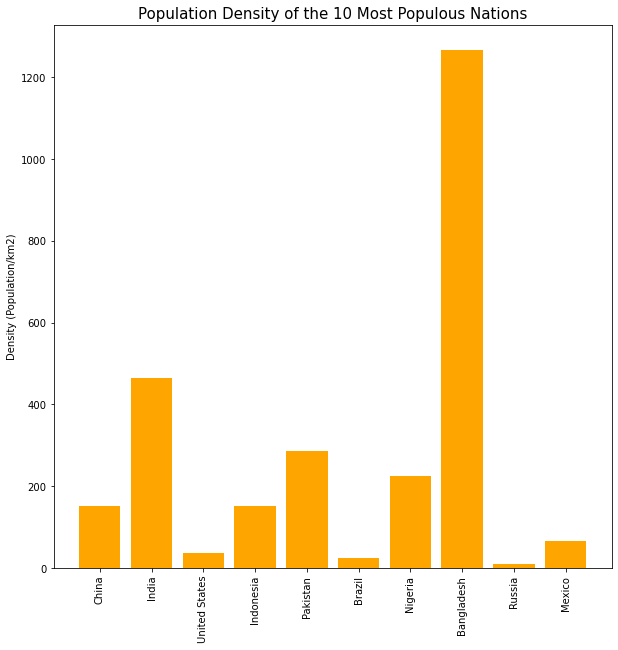

In [16]:
x = population['Country'].head(10)
y = population['Density (Population/km2)'].head(10)
plt.figure(figsize=(10,10))
plt.bar(x, y, color = 'orange')
plt.xticks(x, rotation = 'vertical')
plt.ylabel("Density (Population/km2)")
plt.title("Population Density of the 10 Most Populous Nations", fontsize=15)

To put Bangladesh's density number into perspective, we compare it to the other 9 of the 10 most populated in the world. As we can see, Bangladesh is the 8th most populated country in the world, yet it is the most densely populated within the top 10. In fact, it is about 3 times more densely populated than the 2nd most country, India. This indicates that Bangladesh's land area is much smaller comparing to the remaining 9 countries, yet its population density is so large that it contributes to a population high enough to become 1 of the 10 most populated countries in the world.

In [17]:
least_dense = population.sort_values(by='Density (Population/km2)').head(10)[['Country', 
                                'Continent', 'Population (2021)', 'Land Area (km2)', 'Density (Population/km2)']]
least_dense['Density (Population/km2)'] = round(least_dense['Population (2021)'] / least_dense['Land Area (km2)'], 2)
least_dense.index = np.arange(1, len(least_dense) + 1)
least_dense

,Country,Continent,Population (2021),Land Area (km2),Density (Population/km2)
1,Greenland,Europe,56770,410450,0.14
2,Falkland Islands,South America,3480,12170,0.29
3,Western Sahara,Africa,597339,266000,2.25
4,Mongolia,Asia,3278290,1553560,2.11
5,Australia,Oceania,25499884,7682300,3.32
6,Iceland,Europe,341243,100250,3.40
7,Namibia,Africa,2540905,823290,3.09
8,Canada,North America,37742154,9093510,4.15
9,Libya,Africa,6871292,1759540,3.91
10,Guyana,South America,786552,196850,4.00


In the 10 least densely populated countries and territories in the world, most of them have a large land area, of which some even have more than 1 million square kilometers of land area. These places have conditions so hostile and remote (e.g. desert, ice caps, volcanoes, mountainous terrains etc.) that makes living conditions so difficult to maintain. People in these places are centered in a few settlements that have good living conditions.

## Population Yearly Change

Text(0, 0.5, 'Number of Countries and Territories')

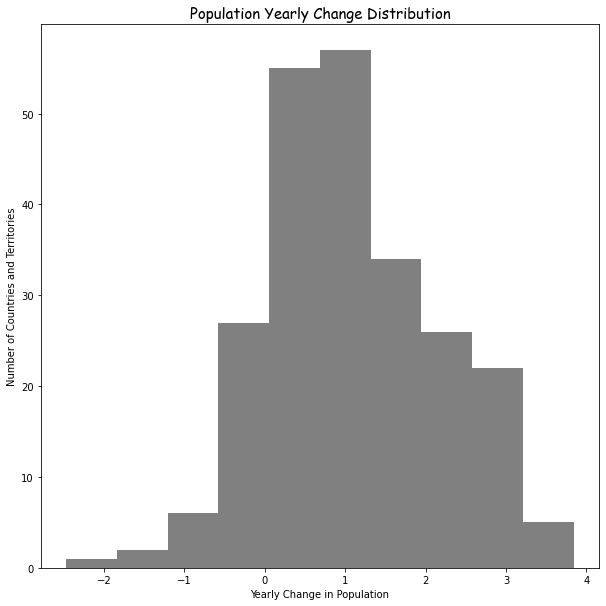

In [18]:
plt.figure(figsize=(10,10))
plt.hist(population['Yearly Change %'], color='grey')
plt.title("Population Yearly Change Distribution", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 15})
plt.xlabel("Yearly Change in Population")
plt.ylabel("Number of Countries and Territories")

This histogram shows the distribution of population yearly change for every country and territory around the world. We notice that most countries have a yearly change between 0.5 and 2 percent, which is relatively stable. However, there are more countries with yearly change above 2 percent than those with negative changes. The reason for this is that those countries with high yearly changes have a high fertility rate, or the average number of births per woman, leading to a family having at least 4-5 children, and it adds up to the overall population.

In [19]:
high_yearly_change = population.sort_values(by = 'Yearly Change %', ascending = False)[population['Yearly Change %'] > 2.5] 
high_yearly_change = high_yearly_change[['Country', 'Continent', 'Population (2021)', 'Net Change', 'Yearly Change %']]
high_yearly_change.index = np.arange(1, len(high_yearly_change) + 1)
high_yearly_change

<ipython-input-19-e1f926508dc2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_yearly_change = population.sort_values(by = 'Yearly Change %', ascending = False)[population['Yearly Change %'] > 2.5]


,Country,Continent,Population (2021),Net Change,Yearly Change %
1,Niger,Africa,24206644,895929,3.84
2,Bahrain,Asia,1701575,60403,3.68
3,Equatorial Guinea,Africa,1402985,46999,3.47
4,Uganda,Africa,45741007,1471413,3.32
5,Angola,Africa,32866272,1040977,3.27
6,Democratic Republic of the Congo,Africa,89561403,2770836,3.19
7,Burundi,Africa,11890784,360204,3.12
8,Falkland Islands,South America,3480,103,3.05
9,Mali,Africa,20250833,592802,3.02
10,Chad,Africa,16425864,478988,3.00


In [20]:
average_yearly_change

1.104

When looking inside the dataset, we notice that most countries with a yearly change of 2.5% or more are from Africa. This is way above the average yearly change in world's population (1.1%). It indicates that while other continents' population is growing slowly, Africa's population continue to grow rapidly. If this trend continues in the coming years, we can expect that some of the world's most populated nations will be in Africa.

Even though the histogram shows that the population continues to increase in many countries every year, some countries actually experience negative change in population. Let's create a table to see which countries satisfy that requirement.

In [21]:
negative_yearly_change = population.sort_values(by = 'Yearly Change %')[population['Yearly Change %'] < 0] 
negative_yearly_change = negative_yearly_change[['Country', 'Continent', 'Population (2021)', 
                                                 'Net Change', 'Yearly Change %', 'Migrants (net)']]
negative_yearly_change.index = np.arange(1, len(negative_yearly_change) + 1)
negative_yearly_change

<ipython-input-21-e8e86bcdf838>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  negative_yearly_change = population.sort_values(by = 'Yearly Change %')[population['Yearly Change %'] < 0]


,Country,Continent,Population (2021),Net Change,Yearly Change %,Migrants (net)
1,Puerto Rico,North America,2860853,-72555,-2.47,-97986.0
2,Wallis and Futuna,Oceania,11239,-193,-1.69,NaN
3,Lithuania,Europe,2722289,-37338,-1.35,-32780.0
4,Latvia,Europe,1886198,-20545,-1.08,-14837.0
5,Bulgaria,Europe,6948445,-51674,-0.74,-4800.0
6,Romania,Europe,19237691,-126866,-0.66,-73999.0
7,Croatia,Europe,4105267,-25037,-0.61,-8001.0
8,Bosnia and Herzegovina,Europe,3280819,-20181,-0.61,-21585.0
9,Ukraine,Europe,43733762,-259876,-0.59,10000.0
10,Greece,Europe,10423054,-50401,-0.48,-16000.0


As we can see, there are 29 countries that experience negative population growth, with Puerto Rico having the highest negative change of 2.47%. There are 2 reasons that explain this decrease. First, the population in these countries are aging, meaning that there are lesser births than before, and more deaths. Second, look at the migrants column; it is the difference between the people who move into the country and those who move out. Many of these countries have a negative change in migrants, indicating that many people left their country due to political unrest, disasters, etc.

## Median Age

Text(0, 0.5, 'Number of Countries and Territories')

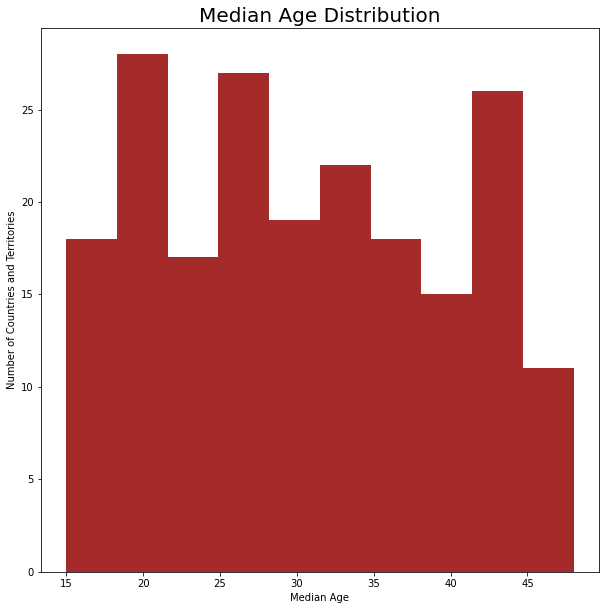

In [22]:
plt.figure(figsize=(10,10))
plt.hist(population['Median Age'], color='brown')
plt.title("Median Age Distribution", fontdict={'fontsize': 20})
plt.xlabel("Median Age")
plt.ylabel("Number of Countries and Territories")

As we can see from this histogram, the median age is not evenly distributed, nor does it have a mountain shape. The graph shows that many countries have the median age of 20, 25, and 40-45. Now we want to look into our dataset to check for countries with the highest and lowest median age

In [23]:
high_median_age = population[population['Median Age'] >= 45]
high_median_age.sort_values(by= 'Median Age', ascending=False)[['Country', 'Continent', 'Median Age']]

,Country,Continent,Median Age
Ranking,,,
11,Japan,Asia,48.0
23,Italy,Europe,47.0
180,Martinique,North America,47.0
19,Germany,Europe,46.0
87,Greece,Europe,46.0
89,Portugal,Europe,46.0
30,Spain,Europe,45.0
104,Hong Kong,Asia,45.0
107,Bulgaria,Europe,45.0


When we go back into the dataset and check for countries with median age of 45 or higher, we see that most countries listed here are located in Asia and Europe (Martinique is a small island in the Caribbeans). Countries with greater median age tend to have lower fertility rate and higher life expectancy. We can also say that these countries are experiencing an aging population. Good living conditions and prosperous economy play a role in the high median age among these countries.

In [24]:
low_median_age = population[population['Median Age'] <= 20]
low_median_age.sort_values(by= 'Median Age')[['Country', 'Continent', 'Median Age']]

,Country,Continent,Median Age
Ranking,,,
56,Niger,Africa,15.0
60,Mali,Africa,16.0
72,Chad,Africa,17.0
16,Democratic Republic of the Congo,Africa,17.0
78,Burundi,Africa,17.0
31,Uganda,Africa,17.0
73,Somalia,Africa,17.0
44,Angola,Africa,17.0
144,Gambia,Africa,18.0


Countries with median age of 20 or younger are mostly located in Africa. The youngest median age is 15 years old and it belongs to Niger. In contrast with countries with high median age, countries with low median age have high fertility rate and low life expectancy. This is reflective of the fact that poverty, disease and ongoing conflict situations contribute to the low life expectancy in many African countries comparing to developed countries.

## Urban Population

C:\Users\phucv\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

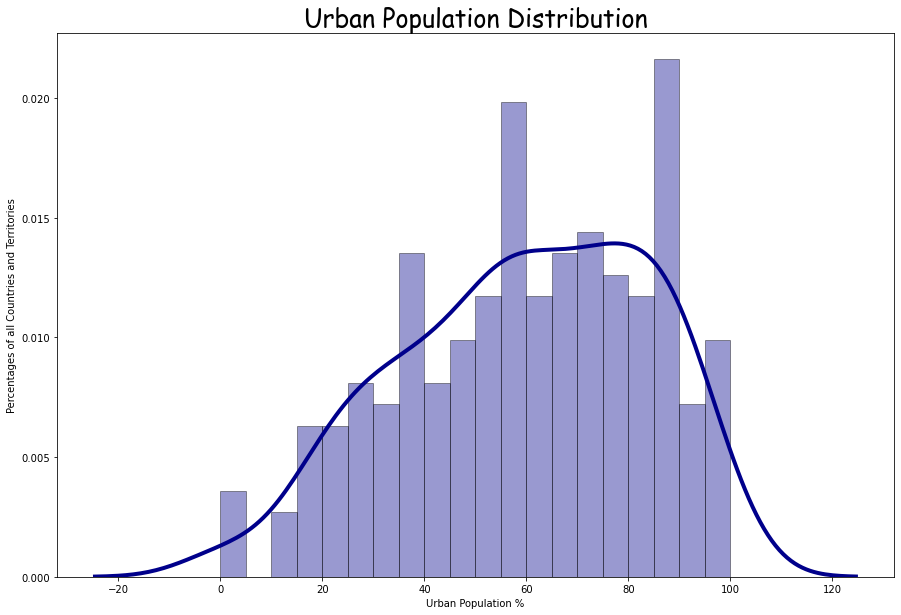

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(population['Urban Population %'], hist=True, kde=True, 
             bins=int(100/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Urban Population Distribution", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 25})
plt.xlabel("Urban Population %")
plt.ylabel("Percentages of all Countries and Territories")
plt.plot()

Based on this density plot (histogram + line graph), we see that there is an uneven distribution of urban population worldwide. However, we do notice that most countries have an urban population of 50% or above. It is clear that the world we are living is going under rapid urbanization, with more people migrating from rural areas live in urban centers. As the world is experiencing advancements in technology and lifestyle, we can expect urbanization to increase dramatically in the next 5-10 years.

In [26]:
urban_percentage = population['Urban Population %'].mean()
urban_population = urban_percentage * population['Population (2021)'].sum() / 100
print(urban_percentage)
round(urban_population)

59.531531531531535


4640627325

By performing some calculations, we discover that more than half of the world's population (**59.53%**) are currently living in urban areas. As living conditions continue to improve in the coming years, we can expect more and more people to migrate from rural areas to urban places.

## Bonus: Top 10 Most Populated Countries In The World

Before analyzing this information, we want to create another column called **"World Share"**. This column will take the country's population divided by the sum of every country's population and multiplied by 100 to obtain the percentage of its population comparing to the world's one.

This value is important because it will allow us to understand how large a country's population is comparing to the entire world share, especially when looking at the 10 most populated countries in the world.

In [27]:
total_population = population['Population (2021)'].sum()
world_share = population['Population (2021)'] / total_population * 100
population['World Share %'] = world_share
population['World Share %'].apply(lambda x: '%.5f' % x)
population

,Country,Continent,Population (2021),Yearly Change %,Net Change,Density (Population/km2),Land Area (km2),Migrants (net),Fertility Rate,Median Age,Urban Population %,World Share %
Ranking,,,,,,,,,,,,
1,China,Asia,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.464131
2,India,Asia,1380004385,0.99,13586631,464,2973190,-532687.0,2.2,28.0,35.0,17.703161
3,United States,North America,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.246214
4,Indonesia,Asia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.508853
5,Pakistan,Asia,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.833681
...,...,...,...,...,...,...,...,...,...,...,...,...
231,Montserrat,North America,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.000064
232,Falkland Islands,South America,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.000045
233,Niue,Oceania,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.000021


In [28]:
ten_most_populated = population.sort_values(by='Population (2021)', ascending = False)
ten_most_populated.head(10)[['Country', 'Continent', 'Population (2021)', 'World Share %', 'Net Change']]

,Country,Continent,Population (2021),World Share %,Net Change
Ranking,,,,,
1,China,Asia,1439323776,18.464131,5540090
2,India,Asia,1380004385,17.703161,13586631
3,United States,North America,331002651,4.246214,1937734
4,Indonesia,Asia,273523615,3.508853,2898047
5,Pakistan,Asia,220892340,2.833681,4327022
6,Brazil,South America,212559417,2.726784,1509890
7,Nigeria,Africa,206139589,2.644428,5175990
8,Bangladesh,Asia,164689383,2.112691,1643222
9,Russia,Asia/Europe,145934462,1.872096,62206


As we can see, China and India alone combined for almost 36% of the world's population, or more than a third. More astonishingly enough, if we consider the population of these two countries separately, they are almost as populated as the remaining 8 countries in the top 10 combined. Most of these countries also have a large positive net change in population, indicating that it will continue to rise by big numbers every year.

To demonstrate how populated these countries are visually, we plot the information obtained from the last graph in a pie chart.

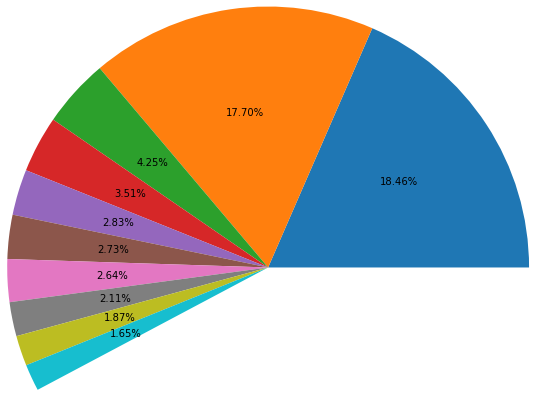

57.766032234744436


In [29]:
plt.pie(population['Population (2021)'].head(10) / population['Population (2021)'].sum(), 
        autopct='%1.2f%%', radius = 3, normalize=False)
plt.show()
print(population['Population (2021)'].head(10).sum() / population['Population (2021)'].sum() * 100)

As we can see, the 10 most populated countries in the world contributed to more than half of the world's population (57.76%). It shows that these countries have experienced rapid population growth over the past few decades.

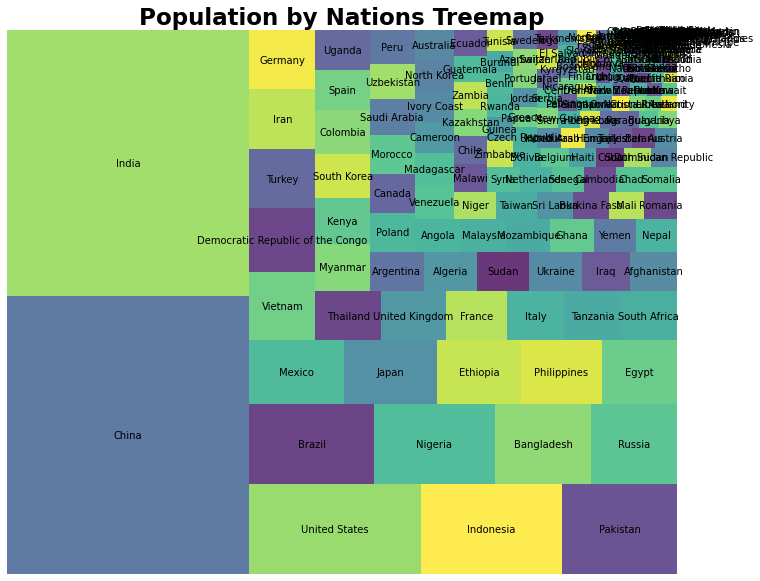

In [30]:
pop_distribution = squarify.plot(sizes=population['Population (2021)'], label = population['Country'], alpha = 0.8)
pop_distribution = plt.gcf()
pop_distribution.set_size_inches(12, 10)
plt.title("Population by Nations Treemap",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

Another graphic shown here is the treemap demonstrating the population for each nation. The graph is quite messy because many countries have population so small that the treemap could barely show the boxes equivalent to them, and many countries' names were put on top of each other. Nonetheless, we notice from this graph that India and China are so populated that their population is equivalent to the population of many less populated nations added together. 

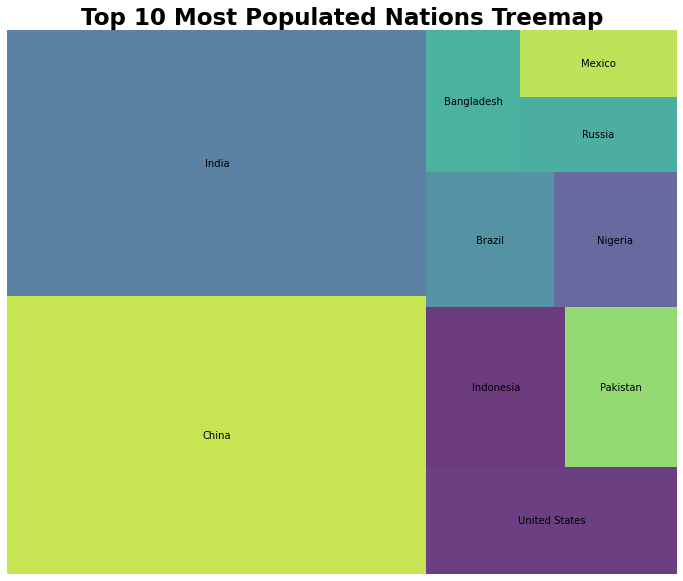

In [31]:
pop_distribution = squarify.plot(sizes=population['Population (2021)'].head(10), 
                                 label = population['Country'], alpha = 0.8)
pop_distribution = plt.gcf()
pop_distribution.set_size_inches(12, 10)
plt.title("Top 10 Most Populated Nations Treemap",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

This treemap shows how the 10 most populated nations in the world compared to each other. This is a much clearer visualization than the previous treemap, which shows the population of every country in the world.

Based on this tree map, we can see that China and India's population are so big, they are equal the population of 5-6 countries added together. It's possible that these countries have the natural resources and the ideal geographical features that allows for growing domestic goods. It's also possible that these countries were already crowded historically, so when more people are available for reproduction, the population continues to skyrocket to this day.

## Conclusion

- **Population Density**: 
    + Most small islands tend to have the densest population, because the land area is so small that people have to live in one congested space.
    + The countries with the least dense population are the ones with huge land area, where the conditions are so remote and hostile that living conditions are not sustainable.
- **Population Yearly Change**:
    + Many countries in Africa are experiencing rapid increase in population per year. If this trend continues, we can expect many of the world's most populous nations to be in Africa in the future.
    + Countries experiencing aging population and large number of people moving out to another country sees a negative change in population yearly.
- **Median Age**:
    + Countries with the highest median age are the ones experiencing aging population.
    + Countries with the lowest median age are the ones with a high fertility rate, leading to more children than adults.
- **Urban Population**:
    + More than half of the world's population is living in urban areas (cities, metros, towns, etc.) which shows rapid urbanization in many parts of the world.